In [91]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [5]:
"""
    data check for kits2019
    
    data folder name : case_00012
    image data file name : imaging.nii.gz
    segmentation data file name : segmentation.nii.gz
    
"""

root_dir = '/Users/sangwook/Downloads/kits19/data/'

example_folder = 'case_00123'

In [6]:
image_file = os.path.join(root_dir, example_folder, 'imaging.nii.gz')
mask_file = os.path.join(root_dir, example_folder, 'segmentation.nii.gz')

In [8]:
image_nii = nib.load(image_file)
mask_nii = nib.load(mask_file)

In [27]:
image_array = image_nii.get_data()
mask_array = mask_nii.get_data()

In [26]:
dict(image_nii.header)

{'sizeof_hdr': array(348, dtype=int32),
 'data_type': array(b'', dtype='|S10'),
 'db_name': array(b'', dtype='|S18'),
 'extents': array(0, dtype=int32),
 'session_error': array(0, dtype=int16),
 'regular': array(b'', dtype='|S1'),
 'dim_info': array(0, dtype=uint8),
 'dim': array([  3, 389, 512, 512,   1,   1,   1,   1], dtype=int16),
 'intent_p1': array(0., dtype=float32),
 'intent_p2': array(0., dtype=float32),
 'intent_p3': array(0., dtype=float32),
 'intent_code': array(0, dtype=int16),
 'datatype': array(64, dtype=int16),
 'bitpix': array(64, dtype=int16),
 'slice_start': array(0, dtype=int16),
 'pixdim': array([1.      , 1.25    , 0.869141, 0.869141, 1.      , 1.      ,
        1.      , 1.      ], dtype=float32),
 'vox_offset': array(0., dtype=float32),
 'scl_slope': array(nan, dtype=float32),
 'scl_inter': array(nan, dtype=float32),
 'slice_end': array(0, dtype=int16),
 'slice_code': array(0, dtype=uint8),
 'xyzt_units': array(0, dtype=uint8),
 'cal_max': array(0., dtype=float3

In [28]:
print(image_array.shape)
print(mask_array.shape)

(389, 512, 512)
(389, 512, 512)


In [58]:
x,y,z = np.where(mask_array == 1)
print(len(x))

379350


In [59]:
x,y,z = np.where(mask_array == 2)
print(len(x))

2256


In [66]:
def show_slice(slice_num):
    plt.subplot(2,1,1)
    plt.imshow(image_array[slice_num], cmap='gray')
    plt.colorbar()
    
    plt.subplot(2,1,2)
    plt.imshow(mask_array[slice_num], cmap='gray')
    plt.colorbar()
    
    plt.show()

(array([2.2822241e+07, 0.0000000e+00, 1.5438450e+06, 3.5147786e+07,
        1.3671990e+06, 2.5109509e+07, 1.5275999e+07, 5.5837100e+05,
        1.3290900e+05, 1.6157000e+04]),
 array([-2048., -1702., -1356., -1010.,  -664.,  -318.,    28.,   374.,
          720.,  1066.,  1412.]),
 <a list of 10 Patch objects>)

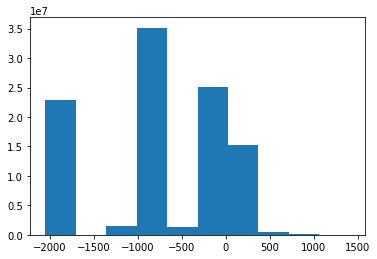

In [60]:
plt.hist(image_array.flatten())

(array([1.0159241e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.7935000e+05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.2560000e+03]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

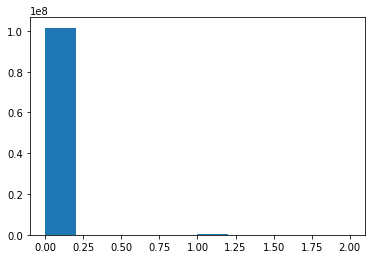

In [61]:
plt.hist(mask_array.flatten())

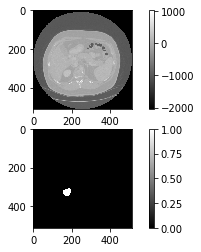

In [77]:
show_slice(100)

In [157]:
def make_mask_bbox(slice_num):
    slice_image = mask_array[slice_num]
    y,z = np.where(slice_image == 1)
    
    if count_mask_bbox(y,z, slice_image) == 2:
        # do something here to make different bboxes
        print("there are 2 regions of tumor")
    else: print("there is only one tumor region")
    
    if len(y) == 0: return
    
    bl = (np.min(z), np.min(y))
    height = np.max(y) - np.min(y)
    width = np.max(z) - np.min(z)
    
    return bl, width, height

In [156]:
def count_mask_bbox(y, z, slice_image):
    z_mean = int((np.min(z) + np.max(z)) / 2)
    y_mean = int((np.min(y) + np.max(y)) / 2)
    
    if slice_image[y_mean, z_mean] == 0:
        return 2
    else: return 1

there are 2 regions of tumor


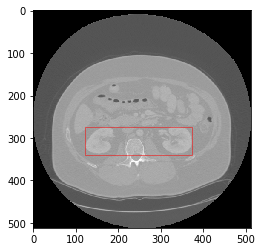

In [165]:
slice_num = 140

# Create figure and axes
fig,ax = plt.subplots(1)

try:
    bl, width, height = make_mask_bbox(slice_num)

    # Create a Rectangle patch
    rect = patches.Rectangle(bl,width,height,linewidth=0.5,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

except:
    pass

# Display the image
# ax.imshow(mask_array[slice_num], cmap = 'gray')
ax.imshow(image_array[slice_num], cmap = 'gray')
plt.show()